In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [3]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
#считаем данные

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
y_train_init = train.label
X_train_init = train.drop('label', axis=1)

In [8]:
#визуализируем

In [9]:
train_img = np.resize(X_train_init.to_numpy(),(X_train_init.shape[0],28,28))
train_img.shape

(42000, 28, 28)

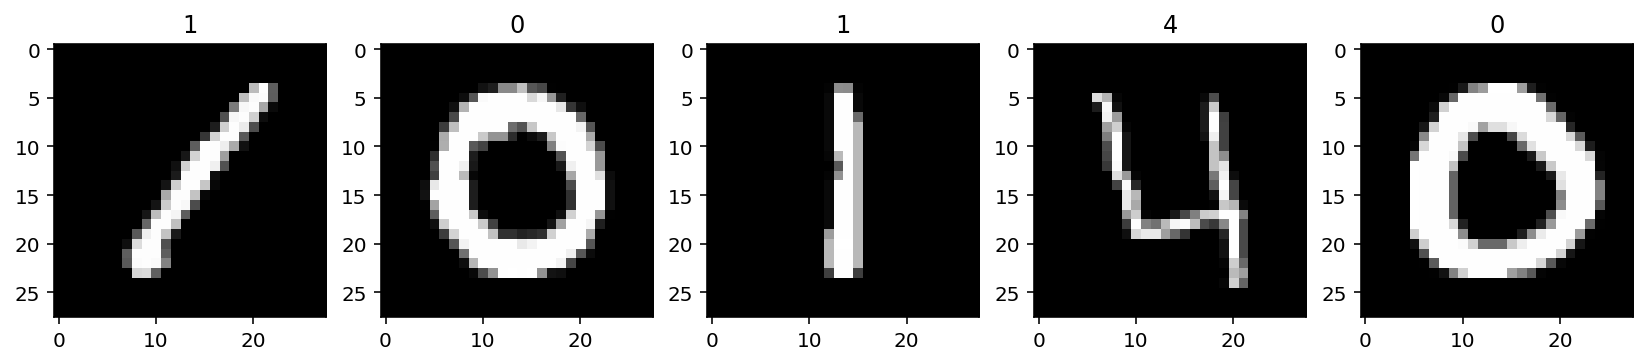

In [11]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_train_init[i - 1]);

In [12]:
#нормализуем данные

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train_init)

C:\Users\costa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_scaled = scaler.transform(X_train_init)

C:\Users\costa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [16]:
#используем метод главных компонент для снижения размерности. попробуем для explained variance = 70%

In [17]:
pca = PCA(0.7)

In [18]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
X_train_pca = pca.transform(X_train_scaled)

In [20]:
#визулизируем важность фичей

In [21]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

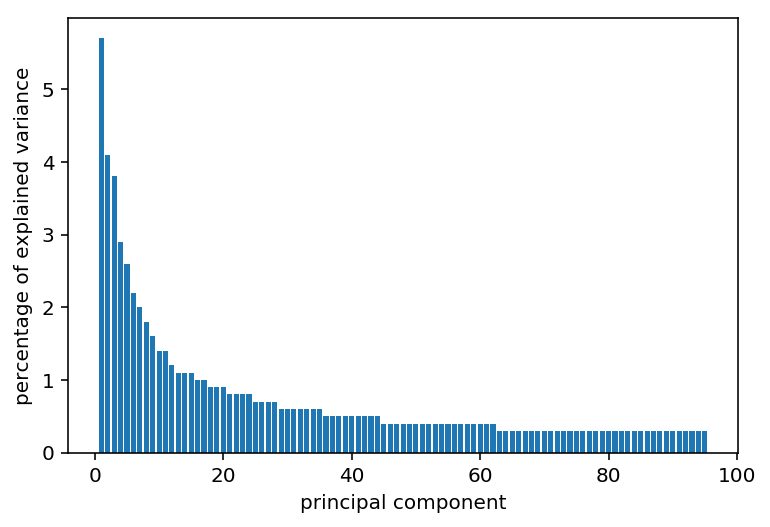

In [22]:
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')
plt.show()

In [23]:
#сколько фичей оставили?

In [25]:
X_train_pca.shape

(42000, 95)

In [37]:
#визуализируем данные после снижения размерности с 748 до 95

In [27]:
X_train_pca_revert = pca.inverse_transform(X_train_pca)

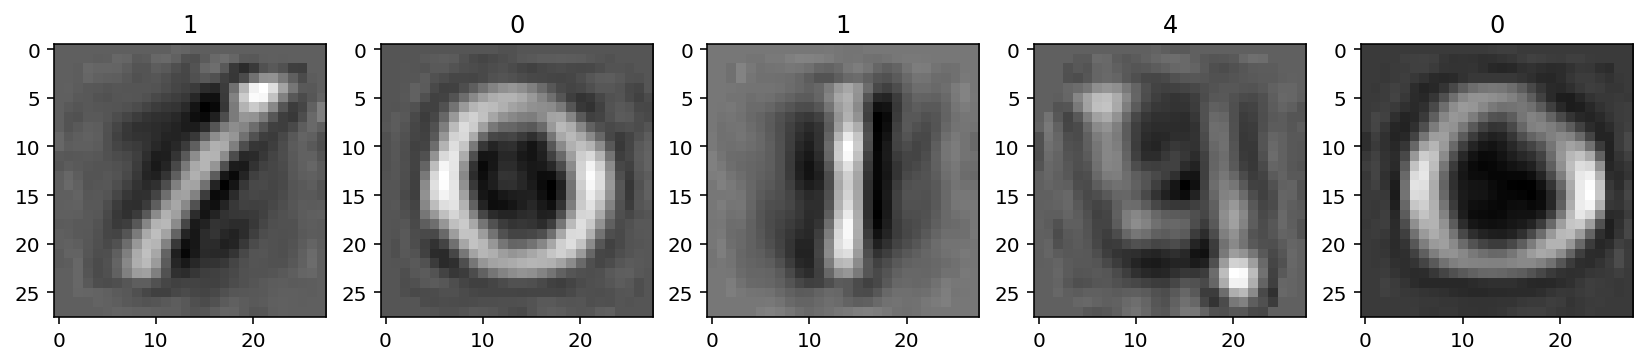

In [28]:
train_pca_img = np.resize(X_train_pca_revert,(X_train_pca_revert.shape[0],28,28))
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_pca_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_train_init[i - 1]);

In [29]:
#разделим данные обучения на train и test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train_init, test_size=0.33, random_state=42)

In [31]:
print(X_train.shape, X_test.shape)

(28140, 95) (13860, 95)


In [32]:
#применим метод k ближайших соседей

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model = KNeighborsClassifier( n_neighbors = 5 )

In [35]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
%%time
y_predict = model.predict(X_test)

Wall time: 53.7 s


In [38]:
accuracy_score(y_test, y_predict)

0.9523088023088023

In [39]:
#хорошее качество, но работает долго

In [40]:
#попробуем простую линейную модель

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model2 = LogisticRegression()

In [43]:
model2.fit(X_train, y_train)

C:\Users\costa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\costa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
%%time
y_predict2 = model2.predict(X_test)

Wall time: 4.96 ms


In [45]:
accuracy_score(y_test, y_predict2)

0.9051226551226551

In [46]:
#ну и норм

In [47]:
test_scaled = scaler.transform(test)

C:\Users\costa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [48]:
test_scaled_pca = pca.transform(test_scaled)

In [49]:
predict_test = model2.predict(test_scaled_pca)

In [51]:
#посмотрим глазами на результат предсказания

In [52]:
test_img = np.resize(test.to_numpy(),(test.shape[0],28,28))

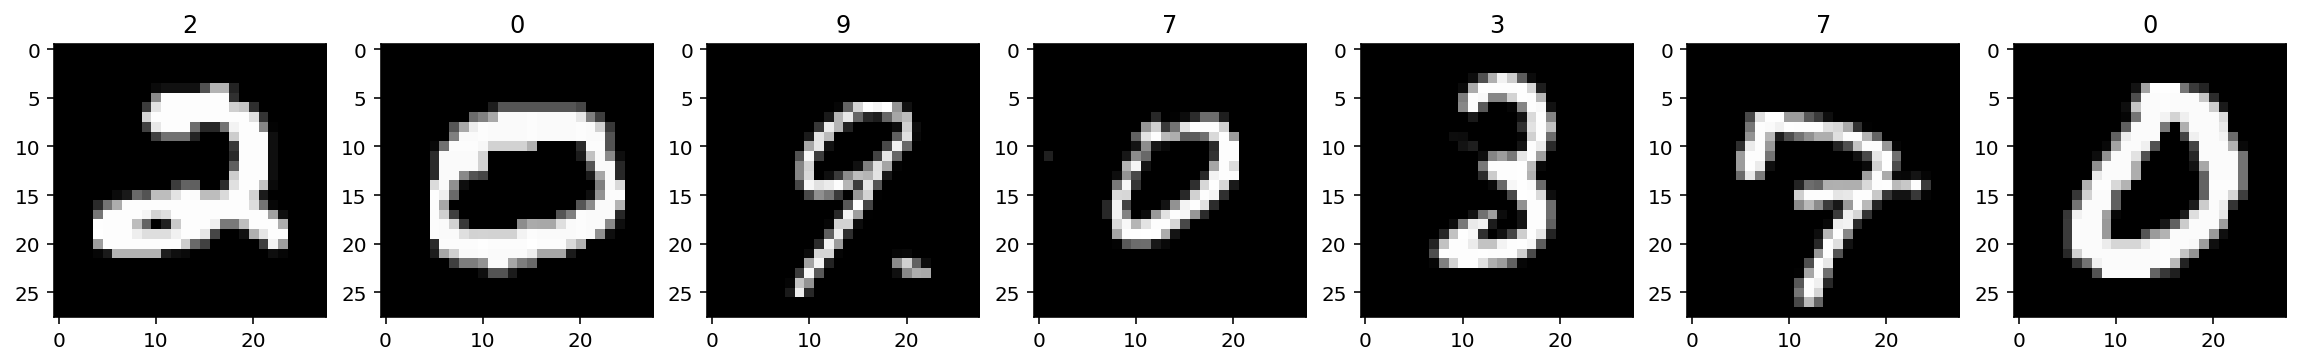

In [56]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:7], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % predict_test[i - 1]);

In [57]:
#только одна ошибка, неплохо

In [58]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(predict_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [60]:
!kaggle competitions submit -c digit-recognizer -f submit.txt -m "1st test submit"

Successfully submitted to Digit Recognizer



  0%|          | 0.00/235k [00:00<?, ?B/s]
 78%|#######8  | 184k/235k [00:00<00:00, 1.86MB/s]
100%|##########| 235k/235k [00:07<00:00, 32.2kB/s]
